In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


In [2]:
print('Codigo igual, gera output igual')

Codigo igual, gera output igual


In [22]:

df = pd.read_csv('/Users/jp.ducatti/Downloads/df_lead_2.csv')
df.head(3)

,date,sales_cost,month,week,year,dias_lead_to_1st_visit,dias_lead_to_1st_ccv
0,2020-01-03,11263.88,1,1,2020,0.0,13.0
1,2020-01-06,26853.84,1,2,2020,172.0,179.0
2,2020-01-07,35261.12,1,2,2020,0.0,6.0


In [23]:
df['date'] = pd.to_datetime(df['date'])

df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.fillna(0)
df = df[list(df.columns[~df.columns.duplicated()])]
df.head(3)

,date,sales_cost,month,week,year,dias_lead_to_1st_visit,dias_lead_to_1st_ccv
0,2020-01-03,11263.88,1,1,2020,0.0,13.0
1,2020-01-06,26853.84,1,2,2020,172.0,179.0
2,2020-01-07,35261.12,1,2,2020,0.0,6.0


In [24]:
df.describe()

,sales_cost,month,week,year,dias_lead_to_1st_visit,dias_lead_to_1st_ccv
count,8.030000e+02,803.000000,803.000000,803.000000,803.000000,803.000000
mean,2.302043e+05,6.214197,25.332503,2020.961395,9.500612,58.692490
std,1.696470e+05,3.395971,14.961639,0.742211,51.834510,84.478457
min,1.096190e+04,1.000000,1.000000,2020.000000,-34.100000,1.000000
25%,9.445522e+04,3.000000,12.500000,2020.000000,0.000000,22.250000
50%,2.025563e+05,6.000000,25.000000,2021.000000,0.166667,36.833333
75%,3.337759e+05,9.000000,38.000000,2022.000000,2.000000,61.181818
max,1.224386e+06,12.000000,53.000000,2022.000000,750.000000,780.000000


In [35]:
df.loc[df['year'] == 2022].groupby(['month']).agg({
  'dias_lead_to_1st_visit': ['mean', 'std'],
  'dias_lead_to_1st_ccv': ['mean', 'std']
})

dias_lead_to_1st_visit           dias_lead_to_1st_ccv           
                        mean       std                 mean        std
month                                                                 
1                   0.853484  7.644884            42.460337  11.984883
2                   1.404405  2.810671            42.193879  11.550815
3                   2.005897  3.625124            31.824392  10.203617
4                   2.665785  3.888352            28.590413   8.245180
5                   0.718177  1.042671            24.108183   6.514106
6                   0.638819  1.659618            20.312303   8.034533
7                   0.494872  0.968513            12.115934   5.589696

In [25]:
df.dtypes

date                      datetime64[ns]
sales_cost                       float64
month                              int64
week                               int64
year                               int64
dias_lead_to_1st_visit           float64
dias_lead_to_1st_ccv             float64
dtype: object

<AxesSubplot:xlabel='month', ylabel='dias_lead_to_1st_ccv'>

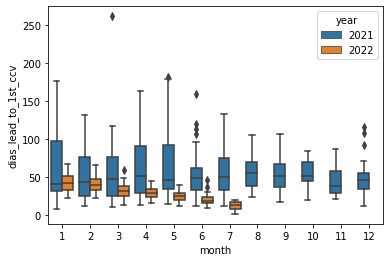

In [26]:
df_20_21 = df.loc[df['year'] >= 2021];

sns.boxplot(x="month", y="dias_lead_to_1st_ccv",hue="year" , data=df_20_21)


<AxesSubplot:xlabel='month', ylabel='dias_lead_to_1st_visit'>

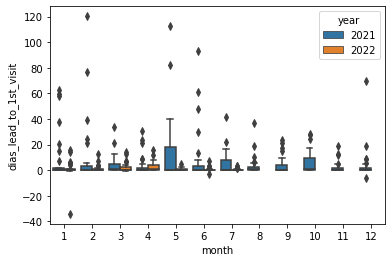

In [27]:
sns.boxplot(x="month", y="dias_lead_to_1st_visit",hue="year" , data=df_20_21)

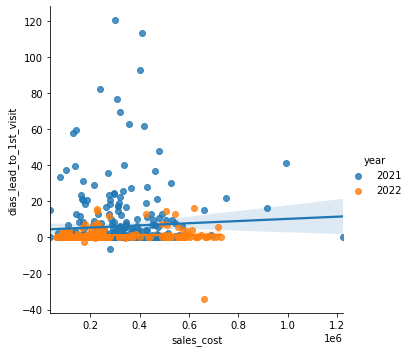

In [37]:
    sns.lmplot(x = "sales_cost", y = "dias_lead_to_1st_visit" , hue = "year", data=df_20_21, fit_reg=True)

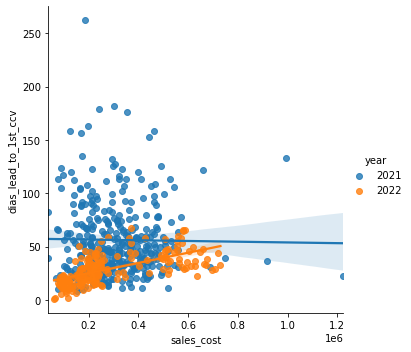

In [38]:
    sns.lmplot(x = "sales_cost", y = "dias_lead_to_1st_ccv" , hue = "year", data=df_20_21, fit_reg=True)

In [40]:
model1 = smf.ols(formula='dias_lead_to_1st_ccv ~ sales_cost', data=df_20_21).fit() 
print(model1.summary())


                             OLS Regression Results                             
Dep. Variable:     dias_lead_to_1st_ccv   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                  0.018
Method:                   Least Squares   F-statistic:                     11.22
Date:                  Thu, 04 Aug 2022   Prob (F-statistic):           0.000862
Time:                          01:33:21   Log-Likelihood:                -2751.4
No. Observations:                   566   AIC:                             5507.
Df Residuals:                       564   BIC:                             5515.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8468      2.867